First few rows of the dataset:
   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                  

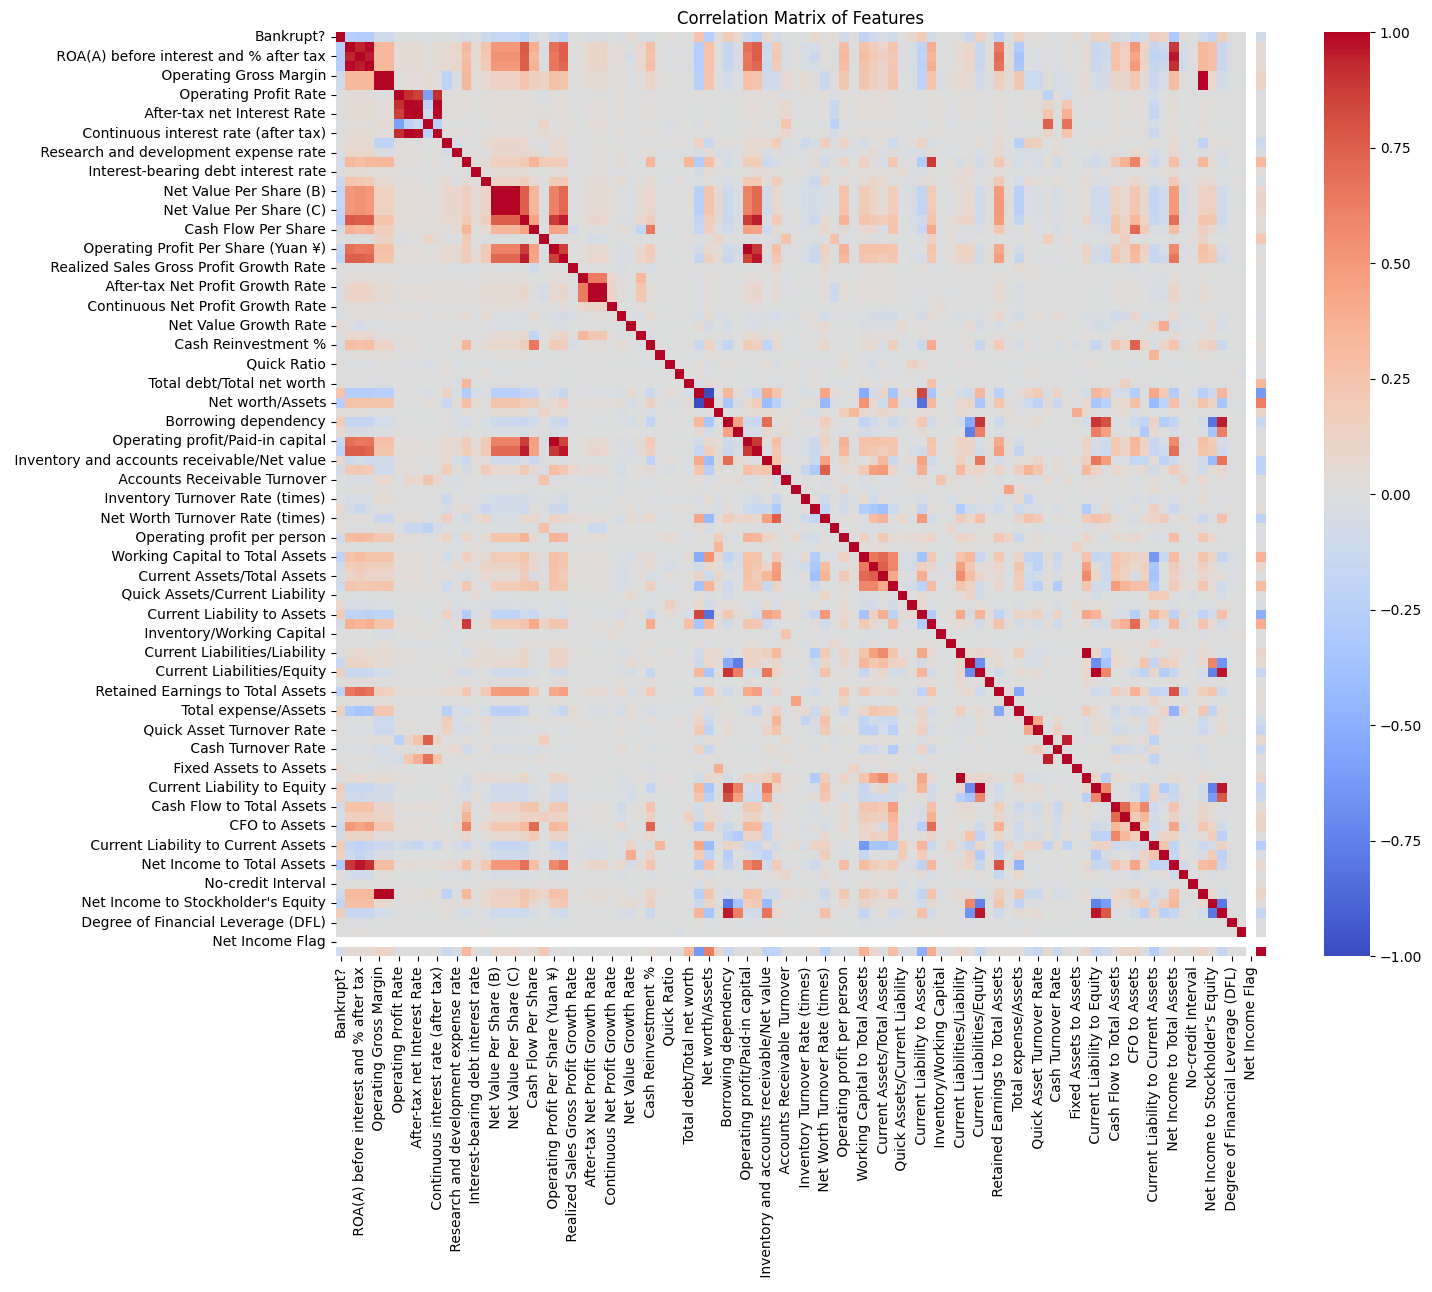

/opt/homebrew/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


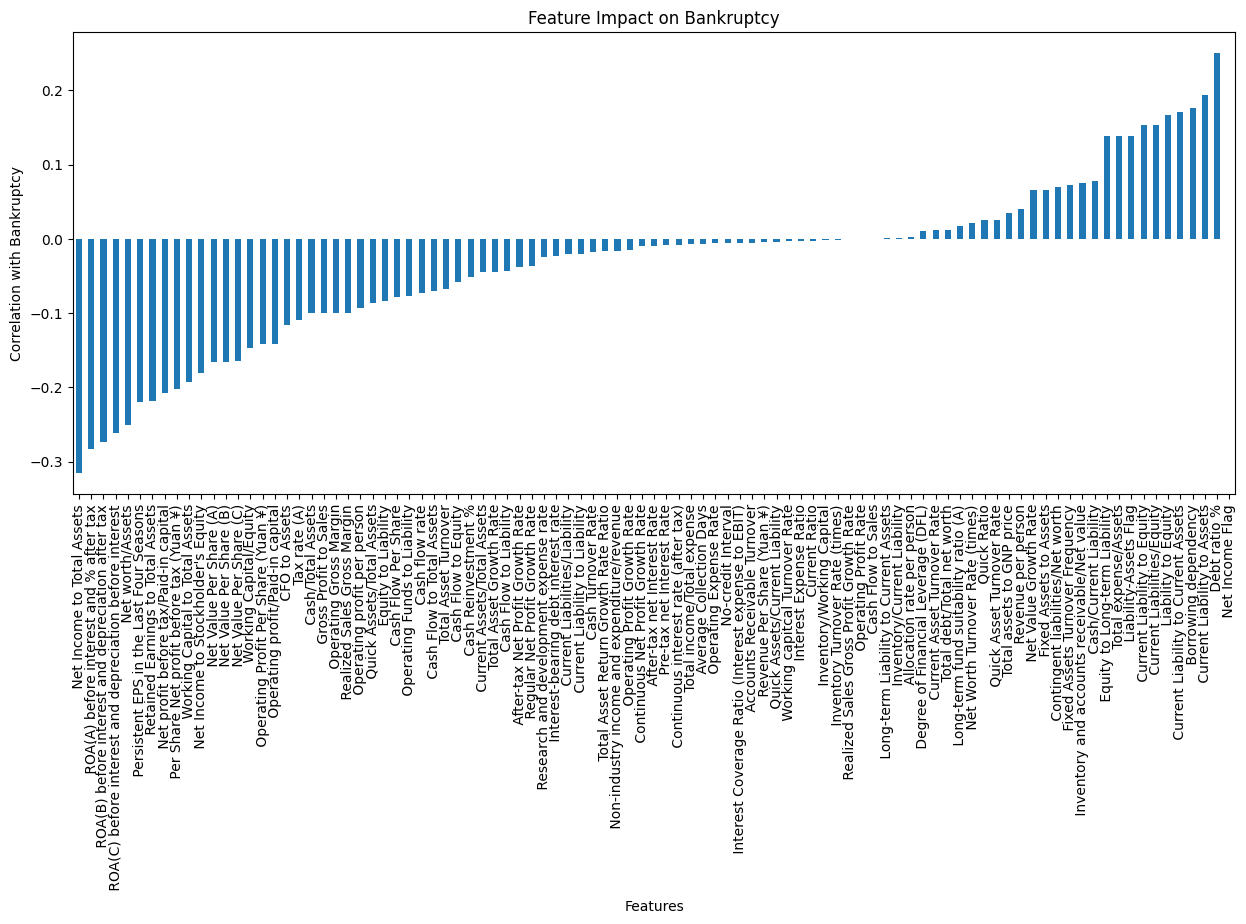

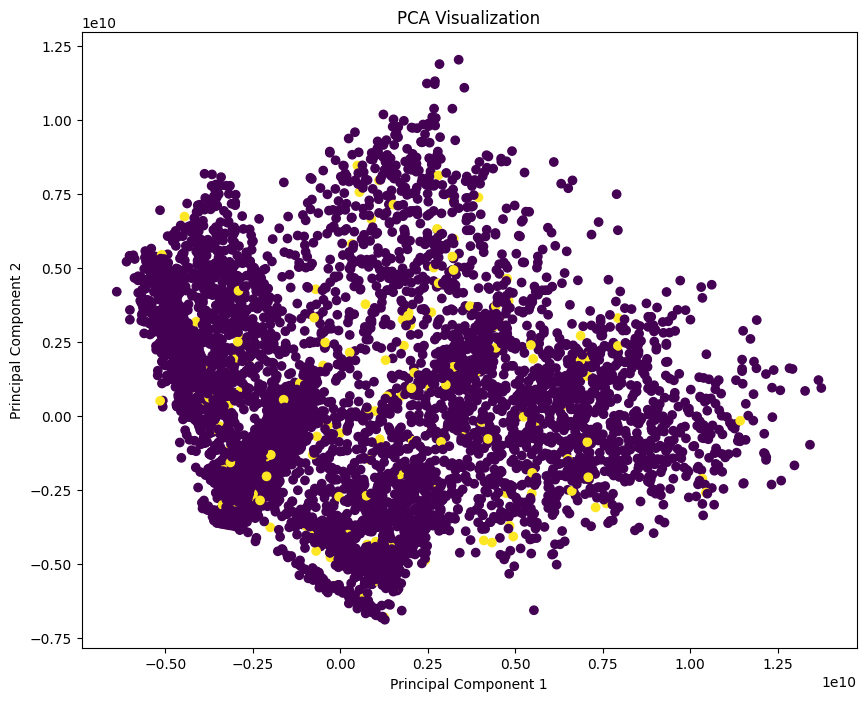

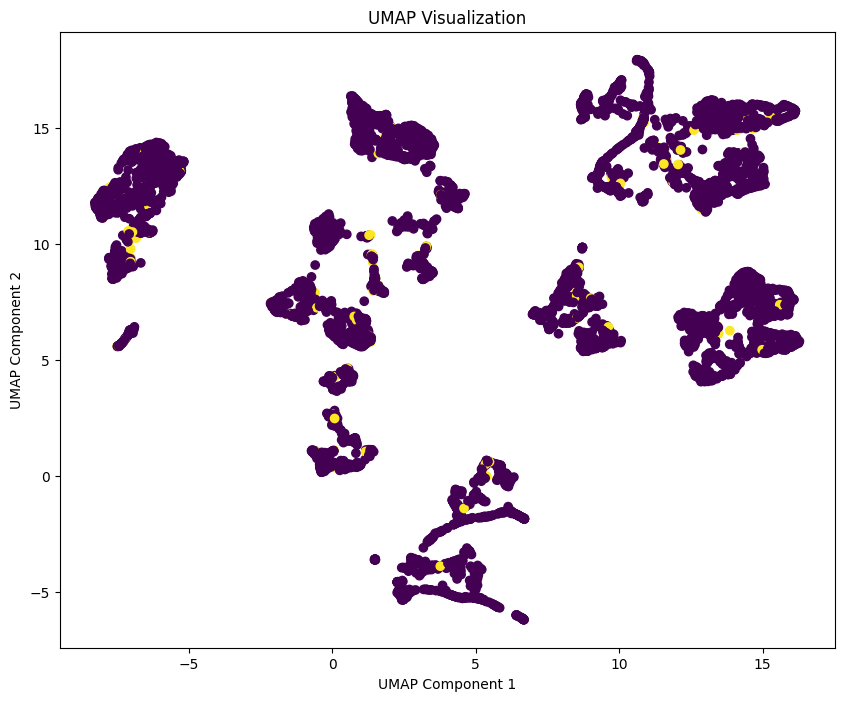

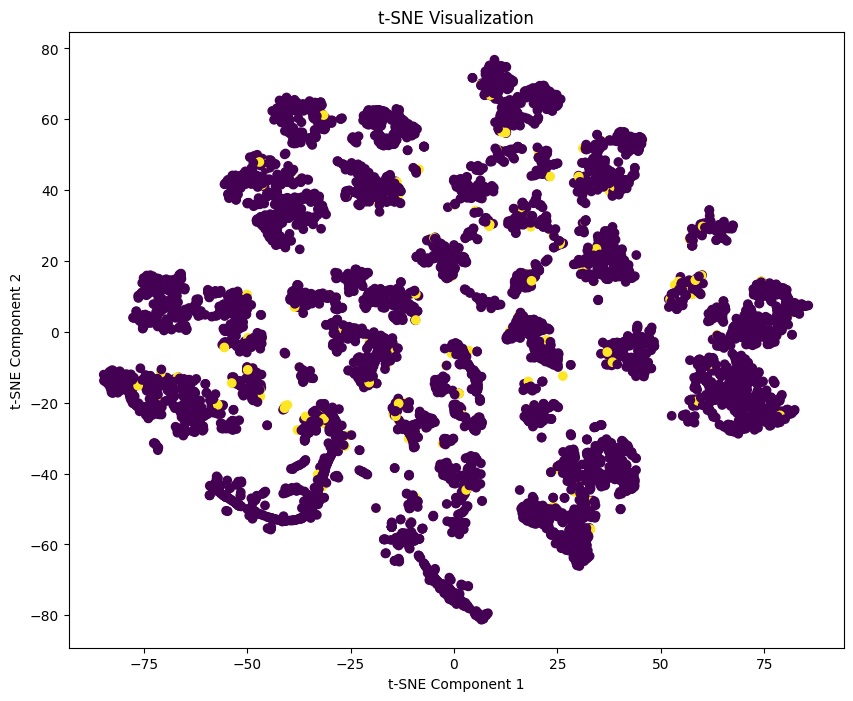

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap.umap_ import UMAP

file_path = 'Dataset/data.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check the dimensions of the dataset
print("\n Dimensions of the dataset:", df.shape)

# Descriptive statistics
print("\n Descriptive statistics:\n", df.describe())

# check for the null values in the dataset
print('\n empty', df.isnull().sum().sum())

# Check data types and missing values
print("\n Data types and missing values:\n", df.info())

# check for the duplicate values in the dataset
print('\n How many duplicate values in the dataset: ', df.duplicated().sum())

# Class distribution for the target variable
print("\n Class distribution for the target variable:\n", df['Bankrupt?'].value_counts())

# check for the data stability
print(
    '\n Number {}% of dataset is stable as of right now '.format(100 * df['Bankrupt?'].value_counts()[0] / df.shape[0]))
print('Number {}% of dataset is unstable/Bankrupt  as of right now '.format(
    100 * df['Bankrupt?'].value_counts()[1] / df.shape[0]))
# Check correlation between features
correlation_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of Features")
plt.show()

# Evaluate feature impact on the target variable
target_column = 'Bankrupt?'
feature_columns = df.columns[df.columns != target_column]

# Calculate correlation between features and target
feature_target_correlation = df[feature_columns].corrwith(df[target_column])

# Plot feature impact on the target
plt.figure(figsize=(15, 6))
feature_target_correlation.sort_values().plot(kind='bar')
plt.title("Feature Impact on Bankruptcy")
plt.xlabel("Features")
plt.ylabel("Correlation with Bankruptcy")
plt.show()

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feature_columns])

# Plot PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df[target_column], cmap='viridis')
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Dimensionality reduction using UMAP
umap = UMAP(n_components=2)
umap_result = umap.fit_transform(df[feature_columns])

# Plot UMAP results
plt.figure(figsize=(10, 8))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=df[target_column], cmap='viridis')
plt.title("UMAP Visualization")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(df[feature_columns])

# Plot t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df[target_column], cmap='viridis')
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()
